In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import *
import matplotlib.pyplot as plt


%matplotlib inline


/home/abhinav/anaconda2/lib/python2.7/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/home/abhinav/anaconda2/lib/python2.7/site-packages/sklearn/qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


# z test

In [54]:
x1 = pd.Series([-8,-5,-3,-2,-1,0,1,2,3,5,8,9])
x2 = pd.Series([0,1,2,3,5,8,9])

y = x1*x1

#x = pd.DataFrame({'a':x1,'b':x2,'c':y})

#sklearn.feature_selection.f_regression(x.iloc[:,:-1], x['c'], center=True)
#stats.pearsonr(x,y)

#sklearn.feature_selection.f_regression()

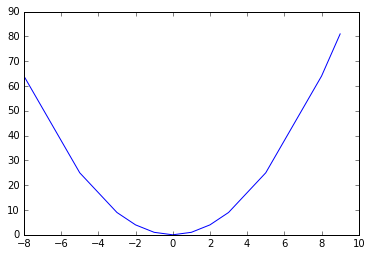

In [55]:


plt.plot(x1,y)

# chi square test

In [4]:
# goodness of fit

nat = pd.DataFrame(["white"]*100000 + ["hispanic"]*60000 +\
                        ["black"]*50000 + ["asian"]*15000 + ["other"]*35000)
           
mini = pd.DataFrame(["white"]*600 + ["hispanic"]*300 + \
                         ["black"]*250 +["asian"]*75 + ["other"]*150)


nt = pd.crosstab(index=nat[0], columns="count")
mt =  pd.crosstab(index=mini[0], columns="count")

In [5]:
# national ratios
ntr = nt/len(nat)

In [7]:
exp = ntr*len(mini)
chi = (((mt - exp)**2)/exp).sum()

crit = stats.chi2.ppf(q = 0.95,df = 4)
p_value = 1 - stats.chi2.cdf(x=chi ,df=4)


In [9]:
stats.chisquare(f_obs= mt, f_exp= exp)  # ------------- one step method

Power_divergenceResult(statistic=array([ 18.19480519]), pvalue=array([ 0.00113047]))

In [10]:
# test for independence

np.random.seed(10)

voter_race = np.random.choice(a= ["asian","black","hispanic","other","white"],
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)


voter_party = np.random.choice(a= ["democrat","independent","republican"],
                              p = [0.4, 0.2, 0.4],
                              size=1000)

In [11]:
voters = pd.DataFrame({"race":voter_race, 
                       "party":voter_party})

voter_tab = pd.crosstab(voters.race, voters.party, margins = True)

voter_tab.columns = ["democrat","independent","republican","row_totals"]

voter_tab.index = ["asian","black","hispanic","other","white","col_totals"]

observed = voter_tab.ix[0:5,0:3]   # Get table without totals for later use
voter_tab

exp =  np.outer(voter_tab["row_totals"][0:5],
                     voter_tab.ix["col_totals"][0:3]) / 1000

exp = pd.DataFrame(exp)
exp.columns = ["democrat","independent","republican"]
exp.index = ["asian","black","hispanic","other","white"]

chi = (((observed-exp)**2)/exp).sum().sum()



crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 8)   # *

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi,  # Find the p-value
                             df=8)
print("P value")
print(p_value)





Critical value
15.5073130559
P value
0.548499652376


In [12]:
# one step method .....
stats.chi2_contingency(observed= observed)   # ---------- one step method

(7.1693212801620589,
 0.51847939294884204,
 8,
 array([[  23.82 ,   11.16 ,   25.02 ],
        [  61.138,   28.644,   64.218],
        [  99.647,   46.686,  104.667],
        [  15.086,    7.068,   15.846],
        [ 197.309,   92.442,  207.249]]))